In [2]:
!pip install -U numpy
!pip install -U pandas


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# Importing libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
insurance_df = pd.read_csv('insurance.csv')

# first 5 rows
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# last 5 rows
insurance_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Basic exploratory data analysis

In [6]:
# checking if there is null values
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# descriptive statistics
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# grouping by region to see if there is any diference
df_region = insurance_df.groupby('region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Seems like the southeast region has higher bmi and charges. Maybe there is some relationship between the two variables

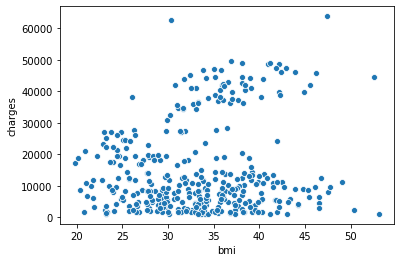

In [10]:
sns.scatterplot(data = insurance_df[insurance_df['region'] == 'southeast'], x='bmi', y='charges')

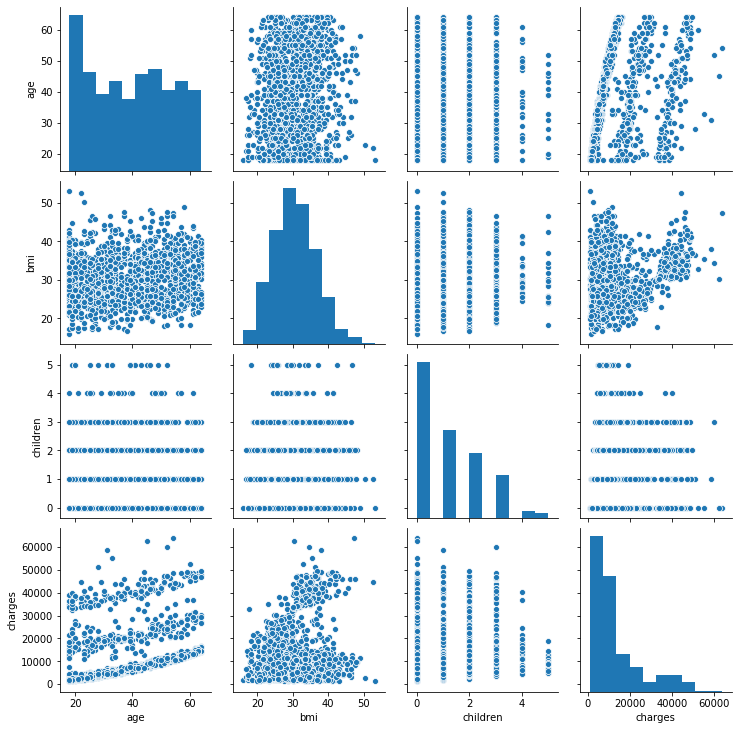

In [15]:
sns.pairplot(insurance_df)

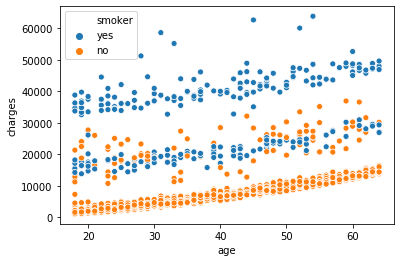

In [23]:
sns.scatterplot(data=insurance_df, x='age', y='charges', hue='smoker')

Seems like age (as expected) is more linearly correlated with charges. Moreover, the smokers commonly have higher charges than non-smokers.

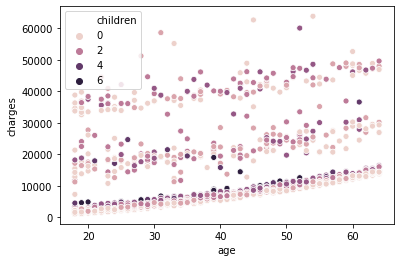

In [24]:
sns.scatterplot(data=insurance_df, x='age', y='charges', hue='children')

In [25]:
df_age = insurance_df.groupby('age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# Performing some Dataprep

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# encoding categorical features
prep_df = pd.get_dummies(insurance_df, drop_first=True)
prep_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


# Visualising the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d317619d0>,
      dtype=object)

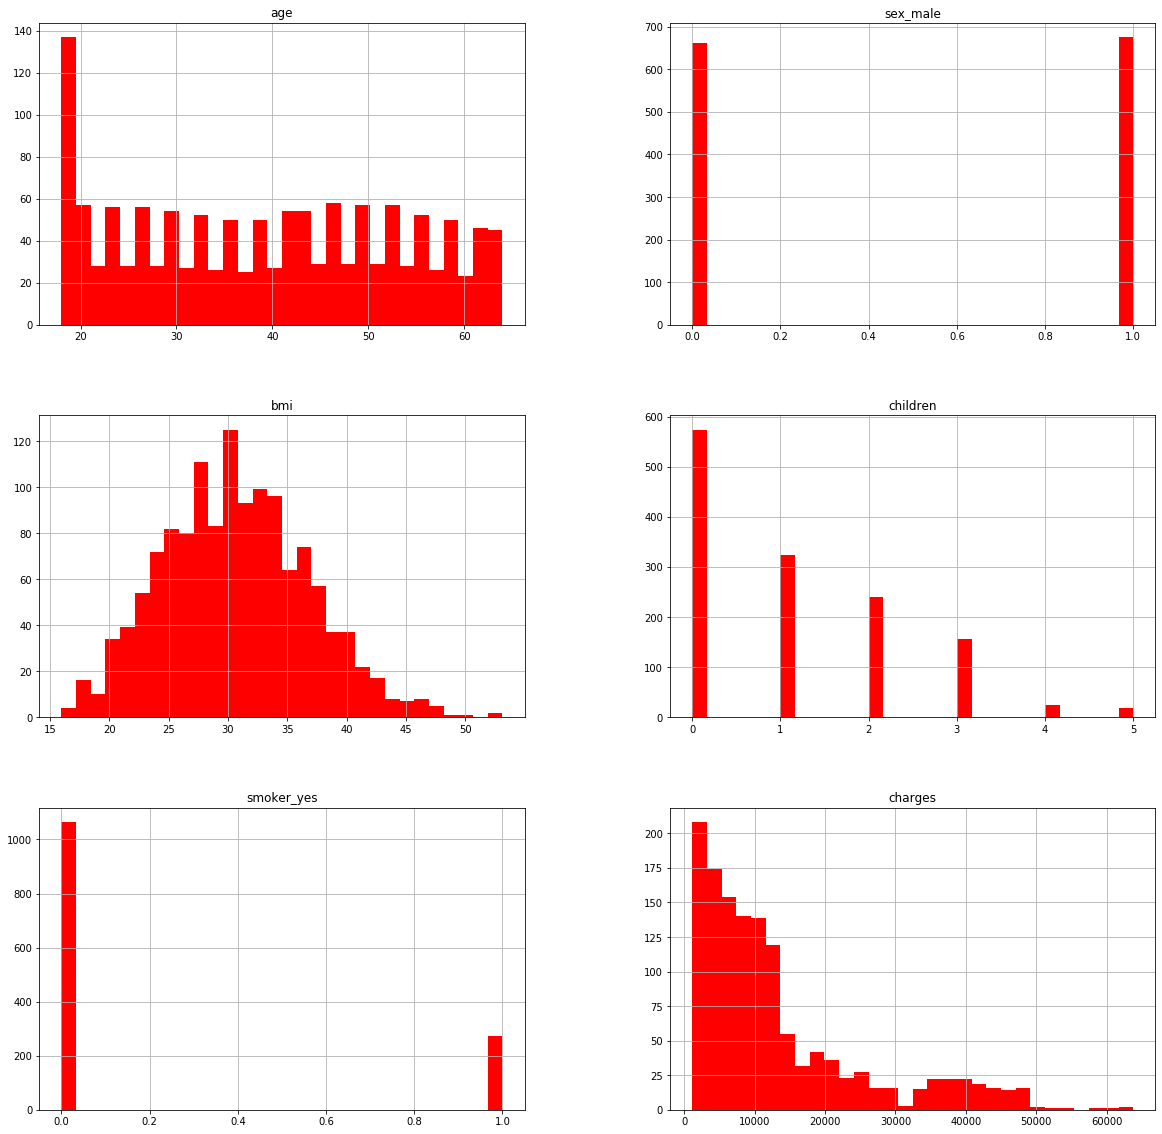

In [33]:
prep_df[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'charges']].hist(bins=30, 
                                                                          figsize=(20, 20), 
                                                                          color='r')

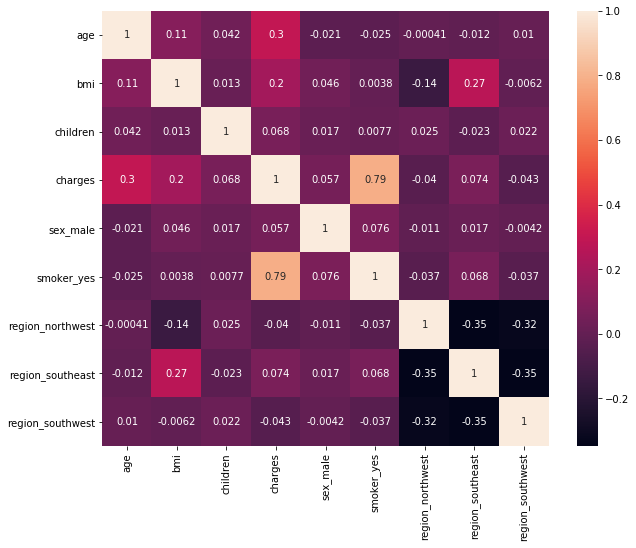

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(prep_df.corr(), annot=True)

In [35]:
prep_df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


# Create training and testing dataset

In [7]:
prep_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [8]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [12]:
X = prep_df.drop(columns=['charges'])
y = prep_df['charges']

In [13]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [14]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [15]:
# scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

In [13]:
X

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [14]:
y

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [16]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 8)
(1070, 1)
(268, 8)
(268, 1)


# Training the linear model using scikit-learn

In [18]:
# importing the libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from math import sqrt

In [18]:
# defining the model
model = LinearRegression()

In [19]:
# fitting the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# measuring the accuracy
model.score(X_test, y_test)

0.8001744488359045

In [21]:
y_predict = model.predict(X_test)
y_predict

array([[ 1.58700616e-01],
       [-3.10455578e-01],
       [ 1.24210499e+00],
       [-6.55531808e-01],
       [-1.70028684e-01],
       [-1.93901642e-01],
       [-8.63145644e-01],
       [-9.00399884e-01],
       [-7.45215052e-01],
       [-3.68718509e-01],
       [-3.76962226e-01],
       [ 2.22587242e-02],
       [ 1.32853600e-02],
       [ 1.35677713e+00],
       [ 3.46978021e-02],
       [ 1.45182710e+00],
       [ 1.58227428e-01],
       [-9.48471985e-01],
       [ 1.67363973e+00],
       [ 1.91906085e+00],
       [ 1.65756186e+00],
       [ 2.26493021e+00],
       [-8.33536521e-01],
       [-2.56076987e-01],
       [-1.09988557e+00],
       [-3.07328240e-01],
       [ 2.29434701e-01],
       [-5.40249136e-01],
       [ 1.10771093e-01],
       [-1.13560834e+00],
       [-3.24496886e-01],
       [ 2.63563293e-01],
       [-6.45740551e-01],
       [-7.71371970e-01],
       [-5.44526674e-01],
       [-1.41274625e-01],
       [ 3.75449591e-01],
       [-5.34166652e-01],
       [-2.7

In [22]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [23]:
y_predict_orig

array([[ 1.51915702e+04],
       [ 9.51220694e+03],
       [ 2.83067055e+04],
       [ 5.33489181e+03],
       [ 1.12121426e+04],
       [ 1.09231488e+04],
       [ 2.82162564e+03],
       [ 2.37064499e+03],
       [ 4.24923264e+03],
       [ 8.80690589e+03],
       [ 8.70711170e+03],
       [ 1.35398749e+04],
       [ 1.34312480e+04],
       [ 2.96948674e+04],
       [ 1.36904560e+04],
       [ 3.08454934e+04],
       [ 1.51858420e+04],
       [ 1.78870890e+03],
       [ 3.35306429e+04],
       [ 3.65015845e+04],
       [ 3.33360125e+04],
       [ 4.06885009e+04],
       [ 3.18005843e+03],
       [ 1.01704861e+04],
       [-4.42259461e+01],
       [ 9.55006487e+03],
       [ 1.60478406e+04],
       [ 6.73044447e+03],
       [ 1.46113601e+04],
       [-4.76667414e+02],
       [ 9.34223008e+03],
       [ 1.64609838e+04],
       [ 5.45341973e+03],
       [ 3.93259048e+03],
       [ 6.67866279e+03],
       [ 1.15602244e+04],
       [ 1.78154217e+04],
       [ 6.80407588e+03],
       [ 9.9

In [24]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)

print('RMSE:', RMSE)
print('MSE:', MSE)
print('MAE:', MAE)

RMSE: 5527.426
MSE: 30552437.41652549
MAE: 4013.10061811349


In [25]:
k = X_test.shape[1]
n = len(X_test)

R2 = r2_score(y_test_orig, y_predict_orig)
R2_adj = 1-(1-R2)*(n - 1)/(n-k-1)

print('R²:', R2)
print('Adjusted R²:', R2_adj)

R²: 0.8001744488359046
Adjusted R²: 0.7940022310393302


# Train a linear learner using SageMaker

In [39]:
# importing the amazon libraries
import sagemaker
import boto3

import io
import os
import numpy as np
import sagemaker.amazon.common as smac

In [ ]:
# creating the sagemaker session
sagemaker_session = sagemaker.Session()

# defining the bucket and the prefix we want
bucket = 'sagemaker-anderici'
prefix = 'linear_learner'

# creating the role
role = sagemaker.get_execution_role()
print(role)

In [55]:
X_train = np.array(X_train, dtype=np.float32)

In [56]:
X_train.shape

(1070, 8)

In [ ]:
y_train = y_train[:,0]

In [58]:
y_train = np.array(y_train, dtype=np.float32)

In [59]:
y_train.shape

(1070,)

In [32]:
X_test.shape

(268, 8)

In [33]:
y_test.shape

(268, 1)

In [60]:
# converting the data to RecordIO format
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) #reset the buffer pointer to 0

0

In [ ]:
# key refers to the name of file
key = 'linear-train-data'

# uploading the RecordIO data to the S3 bucket
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# print the file location
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('Uploaded training data location: {}'.format(s3_train_data))

In [ ]:
# create an output artfact placeholder
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

In [45]:
# retrieving the linear learner imagem
from sagemaker.image_uris import retrieve

container = retrieve('linear-learner', boto3.Session().region_name)

In [47]:
# creating the model object
linear = sagemaker.estimator.Estimator(container, 
                                       role, 
                                       instance_count = 1,
                                       instance_type = 'ml.m4.xlarge', 
                                       output_path = output_location, 
                                       sagemaker_session = sagemaker_session, 
                                       use_spot_instances = True, #use 'sleepy' instances worldwide
                                       max_run = 300, # timeout in seconds for training
                                       max_wait = 600)

In [63]:
# setting the hyperparameters
linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 1000,
                           num_models = 64,
                           loss = 'squared_loss')

In [64]:
# fit the model

linear.fit({'train': s3_train_data})

2022-07-14 14:39:40 Starting - Starting the training job...ProfilerReport-1657809580: InProgress
...
2022-07-14 14:40:32 Starting - Preparing the instances for training............
2022-07-14 14:42:35 Downloading - Downloading input data...
2022-07-14 14:42:56 Training - Downloading the training image......
2022-07-14 14:43:57 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2022 14:44:06 INFO 140358303356736] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'ini

# Deploy the trained model

In [65]:
# deploying the model to perform inference
linear_regressor = linear.deploy(initial_instance_count=1, 
                                 instance_type='ml.m4.xlarge')

-------!

In [66]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [67]:
# making prediction on test data
result = linear_regressor.predict(X_test)
result

{'predictions': [{'score': 0.20877790451049805},
  {'score': -0.2664075493812561},
  {'score': 1.3457064628601074},
  {'score': -0.6804078221321106},
  {'score': -0.15932974219322205},
  {'score': -0.15043967962265015},
  {'score': -0.823238730430603},
  {'score': -0.8442526459693909},
  {'score': -0.711491048336029},
  {'score': -0.34355825185775757},
  {'score': -0.3142933249473572},
  {'score': -0.009478900581598282},
  {'score': 0.04712563753128052},
  {'score': 1.4446989297866821},
  {'score': 0.08906938880681992},
  {'score': 1.5281875133514404},
  {'score': 0.1912286877632141},
  {'score': -0.8831735253334045},
  {'score': 1.7547857761383057},
  {'score': 2.0059614181518555},
  {'score': 1.7493778467178345},
  {'score': 2.351104974746704},
  {'score': -0.7886233925819397},
  {'score': -0.1991475224494934},
  {'score': -1.1224181652069092},
  {'score': -0.34257829189300537},
  {'score': 0.24762123823165894},
  {'score': -0.503442108631134},
  {'score': 0.10945529490709305},
  {'s

In [68]:
# once the result is in json format, we convert it to numpy array
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([ 2.08777905e-01, -2.66407549e-01,  1.34570646e+00, -6.80407822e-01,
       -1.59329742e-01, -1.50439680e-01, -8.23238730e-01, -8.44252646e-01,
       -7.11491048e-01, -3.43558252e-01, -3.14293325e-01, -9.47890058e-03,
        4.71256375e-02,  1.44469893e+00,  8.90693888e-02,  1.52818751e+00,
        1.91228688e-01, -8.83173525e-01,  1.75478578e+00,  2.00596142e+00,
        1.74937785e+00,  2.35110497e+00, -7.88623393e-01, -1.99147522e-01,
       -1.12241817e+00, -3.42578292e-01,  2.47621238e-01, -5.03442109e-01,
        1.09455295e-01, -1.15613985e+00, -2.88097262e-01,  2.95243979e-01,
       -5.97566366e-01, -7.22884715e-01, -4.91620898e-01, -9.75820497e-02,
        4.29723978e-01, -4.76615727e-01, -2.41527915e-01, -1.49519145e-01,
       -5.06462157e-01, -4.17017579e-01, -6.37071788e-01,  1.61794341e+00,
       -4.34747785e-01, -8.81986260e-01,  3.86814773e-02,  7.79014602e-02,
        1.56039745e-01, -3.10833633e-01, -6.95381314e-03, -1.65554136e-01,
        1.26320815e+00, -

In [69]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [70]:
y_predict_orig

array([15797.78005142, 10045.42967873, 29560.85163281,  5033.75559707,
       11341.65846486, 11449.27698374,  3304.71818261,  3050.33454378,
        4657.47806926,  9111.48300905,  9465.74914207, 13155.67557657,
       13840.90096224, 30759.20345388, 14348.65041312, 31769.87324786,
       15585.33827176,  2579.1784234 , 34512.95511351, 37553.55807413,
       34447.48950516, 41731.68821291,  3723.75363486, 10859.64492421,
        -316.99397007,  9123.34589968, 16267.99744418,  7176.01138304,
       14595.43169313,  -725.21132614,  9782.86518387, 16844.493811  ,
        6036.59159726,  4519.55221345,  7319.11286774, 12089.144229  ,
       18472.43942497,  7500.75774346, 10346.60971892, 11460.42049587,
        7139.45223564,  8222.22222706,  5558.35930339, 32856.41185905,
        8007.58948167,  2593.55084105, 13738.68030753, 14213.45722153,
       15159.35904918,  9507.63039161, 13186.24298471, 11266.30915869,
       28562.16955643, 11127.01489633, 14951.79237568,  6804.7702263 ,
      

In [71]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)

print('RMSE:', RMSE)
print('MSE:', MSE)
print('MAE:', MAE)

k = X_test.shape[1]
n = len(X_test)

R2 = r2_score(y_test_orig, y_predict_orig)
R2_adj = 1-(1-R2)*(n - 1)/(n-k-1)

print('R²:', R2)
print('Adjusted R²:', R2_adj)

RMSE: 5570.414
MSE: 31029513.79166075
MAE: 4134.864203083105
R²: 0.7970541724301601
Adjusted R²: 0.7907855754395858


In [72]:
# delete the end-point
linear_regressor.delete_endpoint()

# Task #9: bulding an ANN regression model

In [19]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 4.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 521.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 1.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 823.9 kB/s eta 0:00:00a 0:0

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [21]:
X_train.shape

(1070, 8)

In [23]:
ann_model = keras.Sequential()
ann_model.add(Dense(50, input_dim=8))
ann_model.add(Activation('relu'))
ann_model.add(Dense(150))
ann_model.add(Activation('relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(150))
ann_model.add(Activation('relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(50))
ann_model.add(Activation('linear'))
ann_model.add(Dense(1))
ann_model.compile(loss='mse', optimizer='adam')
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [24]:
epochs_hist = ann_model.fit(X_train, 
                            y_train, 
                            epochs=100, 
                            batch_size=20, 
                            validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 0.5145 - val_loss: 0.2423
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2804 - val_loss: 0.1981
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2393 - val_loss: 0.1901
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2179 - val_loss: 0.1822
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2144 - val_loss: 0.1777
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2067 - val_loss: 0.1628
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1890 - val_loss: 0.1676
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2053 - val_loss: 0.1649
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1784 - val_loss: 0.1701
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1843 - val_loss: 0.1691
Epoch 11/

In [25]:
result = ann_model.evaluate(X_test, y_test)
accuracy_ann = 1 - result
print('Accuracy:', accuracy_ann)

9/9 [==============================] - 0s 3ms/step - loss: 0.1546
Accuracy: 0.8454102277755737


In [26]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

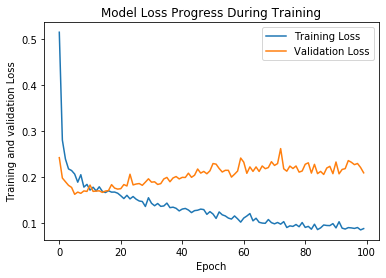

In [28]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True values')

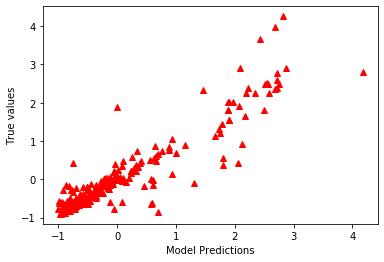

In [29]:
y_predict = ann_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True values')

In [30]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True values')

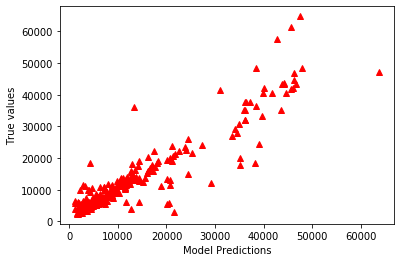

In [31]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True values')

In [34]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

rmse = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
mse = mean_squared_error(y_test_orig, y_predict_orig)
mae = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE:', rmse, '\nMSE:', mse, '\nMAE:', mae, '\nR2:', r2, '\nAdjusted R2:', adj_r2)

RMSE: 4759.623 
MSE: 22654012.31329229 
MAE: 2712.8407328828125 
R2: 0.8518334090708812 
Adjusted R2: 0.8472568348336884
